# **Análisis del Precio de las tortillas en México del 2007 al 2024**

In [27]:
# Cargar las librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import locale

In [2]:
# Cargar el dataset 
df_tortilla_prices = pd.read_csv('../data/processed/tortilla_prices_sin_nulos.csv')
df_tortilla_prices.head(15)

,State,City,Year,Month,Day,Store type,Price per kilogram
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.90
1,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.00
2,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.00
3,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.00
4,Coahuila,Piedras Negras,2007,1,10,Mom and Pop Store,10.00
5,Colima,Colima,2007,1,10,Mom and Pop Store,10.00
6,Chiapas,Tuxtla Gutiérrez,2007,1,10,Mom and Pop Store,9.20
7,Chihuahua,Chihuahua,2007,1,10,Mom and Pop Store,10.00
8,D.F.,D.F.,2007,1,10,Mom and Pop Store,8.33
9,D.F.,ZM D.F.,2007,1,10,Mom and Pop Store,7.67


#### **1.-¿Cómo ha evolucionado el precio de la tortilla en México entre 2007 al 2024?**

In [3]:
# Agrupamos
promedio_anula = df_tortilla_prices.groupby('Year')['Price per kilogram'].mean()
print(f'Promedio anual:\n{promedio_anula}')

Promedio anual:
Year
2007     7.399119
2008     7.598889
2009     8.094949
2010     8.670437
2011     9.737406
2012    11.265235
2013    11.710039
2014    11.619433
2015    11.632321
2016    11.855625
2017    12.520789
2018    12.892546
2019    13.419217
2020    14.033255
2021    15.273879
2022    17.333422
2023    19.007899
2024    19.564326
Name: Price per kilogram, dtype: float64


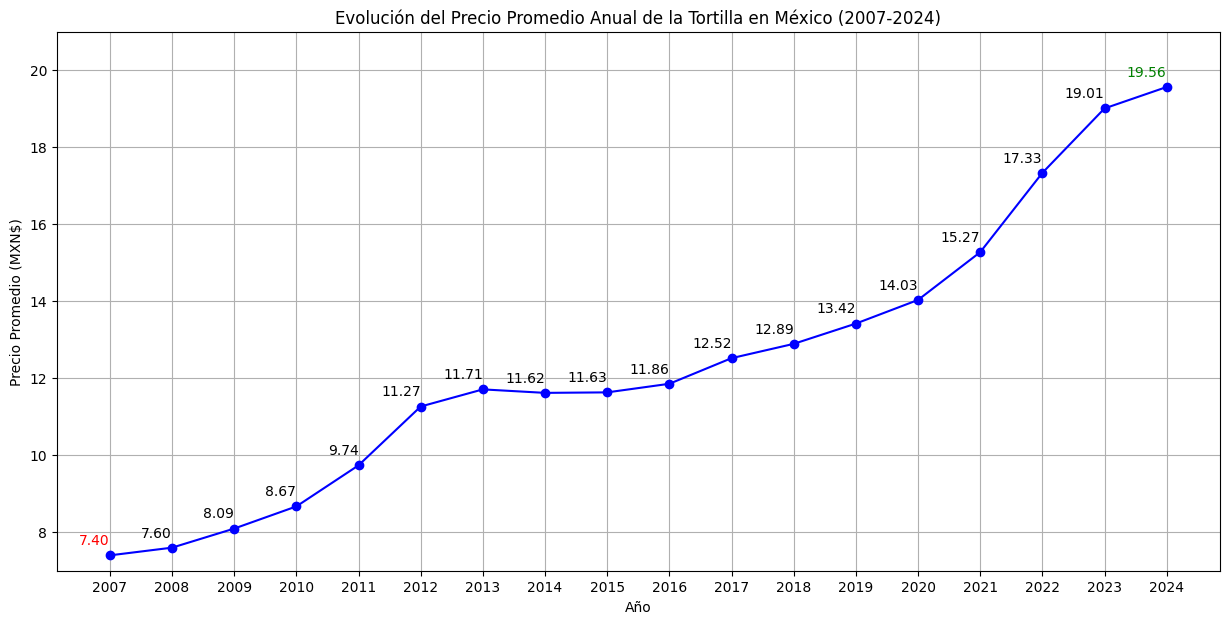

In [4]:
# year = df_tortilla_prices['Year']
# price_per_kilogram = df_tortilla_prices['Price per kilogram']

min_precio = promedio_anula.values.min()
max_precio = promedio_anula.values.max()

plt.figure(figsize=(15,7))
plt.plot(promedio_anula.index, promedio_anula.values, marker='o', linestyle='-', color='b')

# Agregar los valores de ventas en cada punto con colores para min y max
for x, y in zip(promedio_anula.index, promedio_anula.values):
    color = 'black'  # Color por defecto
    offeset = 0.2
    va = 'bottom'
    if y == min_precio:
        color = 'red'  # Color para el mínimo
        va = 'top'
    elif y == max_precio:
        color = 'green'  # Color para el máximo
        offeset = 0.2
        va = 'bottom'
    plt.text(x, y + offeset, f'{y:.2f}', ha='right', va='bottom', color=color)

plt.ylim(7,21)
plt.title('Evolución del Precio Promedio Anual de la Tortilla en México (2007-2024)')
plt.xlabel('Año')
plt.ylabel('Precio Promedio (MXN$)')
plt.grid(True)

plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%d'))

plt.show()

##### **2.-¿Existen diferencias significa entre estados del 2007 y el 2024?**

In [5]:
year_2007 = df_tortilla_prices['Year'] == 2007

states_2007 = df_tortilla_prices[year_2007]

promedio_state_2007 = states_2007.groupby('State')['Price per kilogram'].mean()


print(f'{"Precio promedio por estados del 2007":<20}')
print(f'{"Estado":<20} {"Precio(MXN$)"}')
for estados, precio in promedio_state_2007.items():
    print(f'{estados:<25} ${precio:>5.2f}')

Precio promedio por estados del 2007
Estado               Precio(MXN$)
Aguascalientes            $ 7.72
Baja California           $ 8.47
Baja California Sur       $ 7.57
Campeche                  $ 7.43
Chiapas                   $ 6.94
Chihuahua                 $ 7.35
Coahuila                  $ 7.32
Colima                    $ 7.21
D.F.                      $ 6.98
Durango                   $ 6.99
Edo. México               $ 6.90
Guanajuato                $ 7.32
Guerrero                  $ 7.78
Hidalgo                   $ 7.04
Jalisco                   $ 7.11
Michoacán                 $ 7.11
Morelos                   $ 7.86
Nayarit                   $ 7.17
Nuevo León                $ 7.18
Oaxaca                    $ 6.81
Puebla                    $ 6.99
Querétaro                 $ 7.26
Quintana Roo              $ 7.59
San Luis Potosí           $ 7.24
Sinaloa                   $ 7.21
Sonora                    $ 8.56
Tabasco                   $ 7.67
Tamaulipas                $ 7.57
Tlaxc

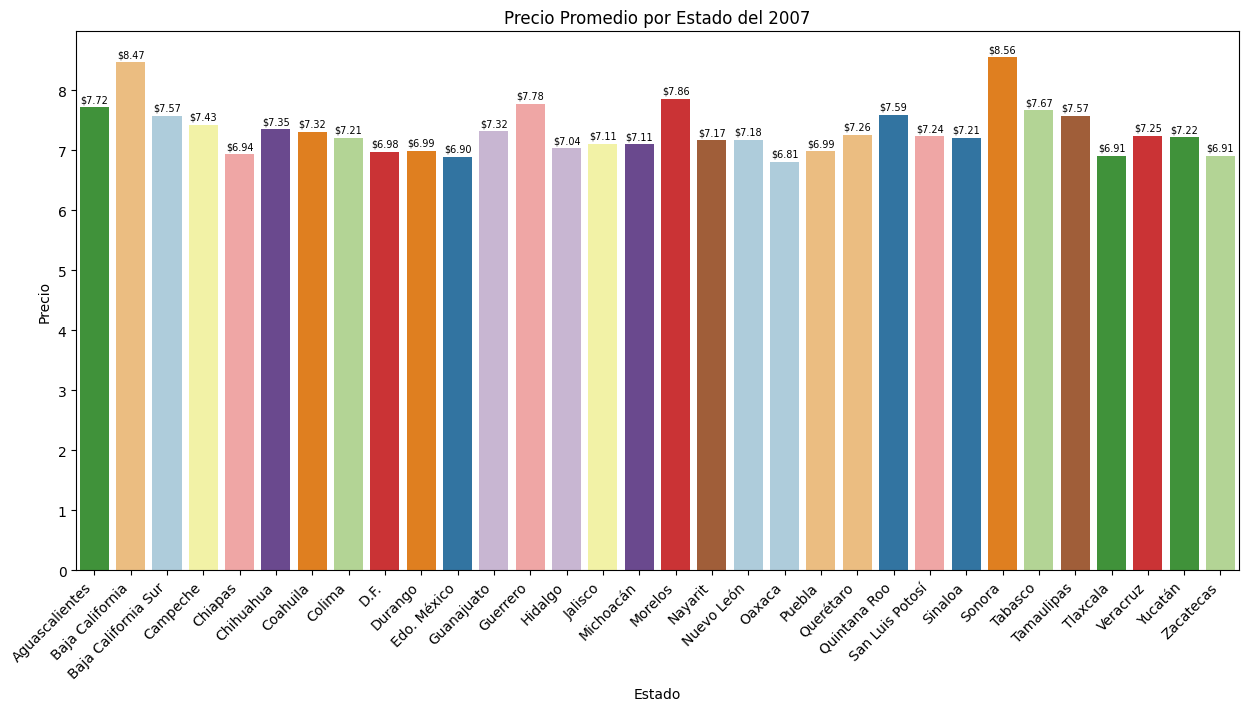

In [6]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x=promedio_state_2007.index, y=promedio_state_2007.values, hue=promedio_state_2007, palette='Paired', legend=False)

# Añadir las etiquetas de valor en cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05,
            f'${height:.2f}', ha='center', va='bottom', fontsize=7)

plt.title('Precio Promedio por Estado del 2007')
plt.xlabel('Estado')
plt.ylabel('Precio')
plt.xticks(rotation=45, ha='right')

plt.show()

In [7]:
year_2024 = df_tortilla_prices['Year'] == 2024

states_2024 = df_tortilla_prices[year_2024]

promedio_state_2024 = states_2024.groupby('State')['Price per kilogram'].mean() 

print(f'{"Precio promedio por estados del 2024":<20}')
print(f'{"Estado":<20} {"Precio(MXN$)"}')
for estados, precio in promedio_state_2024.items():
    print(f'{estados:<25} ${precio:>5.2f}')

Precio promedio por estados del 2024
Estado               Precio(MXN$)
Aguascalientes            $17.56
Baja California           $21.64
Baja California Sur       $20.15
Campeche                  $19.12
Chiapas                   $18.12
Chihuahua                 $21.44
Coahuila                  $21.56
Colima                    $20.88
D.F.                      $17.19
Durango                   $19.21
Edo. México               $16.93
Guanajuato                $18.56
Guerrero                  $20.81
Hidalgo                   $18.39
Jalisco                   $19.51
Michoacán                 $17.74
Morelos                   $19.98
Nayarit                   $19.00
Nuevo León                $20.22
Oaxaca                    $19.34
Puebla                    $15.67
Querétaro                 $19.48
Quintana Roo              $19.82
San Luis Potosí           $18.45
Sinaloa                   $20.06
Sonora                    $21.89
Tabasco                   $18.25
Tamaulipas                $21.37
Tlaxc

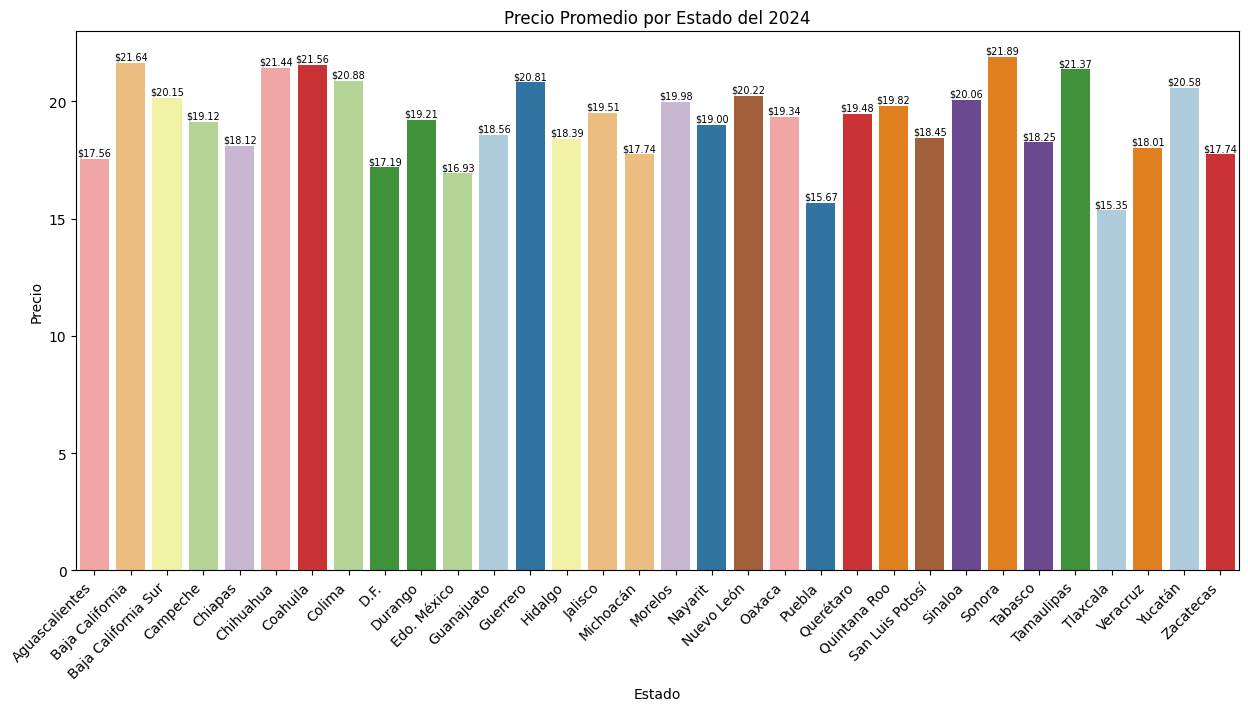

In [8]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x=promedio_state_2024.index, y=promedio_state_2024.values, hue=promedio_state_2024, palette='Paired', legend=False)

# Añadir las etiquetas de valor en cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05,
            f'${height:.2f}', ha='center', va='bottom', fontsize=7)

plt.title('Precio Promedio por Estado del 2024')
plt.xlabel('Estado')
plt.ylabel('Precio')
plt.xticks(rotation=45, ha='right')

plt.show()

##### **3.-¿Hay algun estado que destaca del 2007 y 2024(Precios Máximos y Mínimos)?**

In [ ]:
min_state_2007 = promedio_state_2007.idxmin()
min_precio_state_2007 = promedio_state_2007[min_state_2007]

max_state_2007 = promedio_state_2007.idxmax()
max_precio_state_2007 = promedio_state_2007[max_state_2007]


print('Estados del 2007 con precios Mínimos')
print(f'{"Estado":<11} Precio \n{min_state_2007:<11} ${min_precio_state_2007:.2f}')

print('\nEstados del 2007 con precios Máximos')
print(f'{"Estado":<11} Precio \n{max_state_2007:<11} ${max_precio_state_2007:.2f}')


Esatdo del 2007 con precios Mínimos
Estado      Precio 
Oaxaca      $6.81

Esatdo del 2007 con precios Máximos
Estado      Precio 
Sonora      $8.56


In [10]:
min_state_2024 = promedio_state_2024.idxmin()
min_precio_state_2024 = promedio_state_2024[min_state_2024]

max_state_2024 = promedio_state_2024.idxmax()
max_precio_state_2024 = promedio_state_2024[max_state_2024]

print('\nEsatdo del 2024 con precios Mínimos')
print(f'{"Estado":<11} Precio \n{min_state_2024:<11} ${min_precio_state_2024:.2f}')

print('\nEsatdo del 2007 con precios Máximos')
print(f'{"Estado":<11} Precio \n{max_state_2024:<11} ${max_precio_state_2024:.2f}')


Esatdo del 2024 con precios Mínimos
Estado      Precio 
Tlaxcala    $15.35

Esatdo del 2007 con precios Máximos
Estado      Precio 
Sonora      $21.89


##### **4.-¿Qué años se registraron cambios abruptos o comportamientos atípicos?**

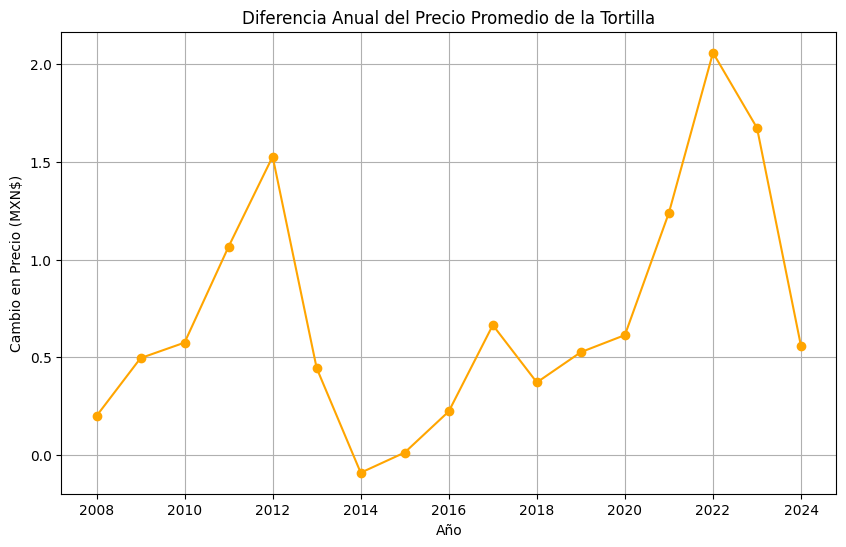

In [56]:
diferencia_anual = promedio_anula.diff().dropna()
plt.figure(figsize=(10, 6))
plt.plot(diferencia_anual.index, diferencia_anual.values, marker='o', linestyle='-', color='orange')
plt.title('Diferencia Anual del Precio Promedio de la Tortilla')
plt.xlabel('Año')
plt.ylabel('Cambio en Precio (MXN$)')
plt.grid(True)
plt.show()

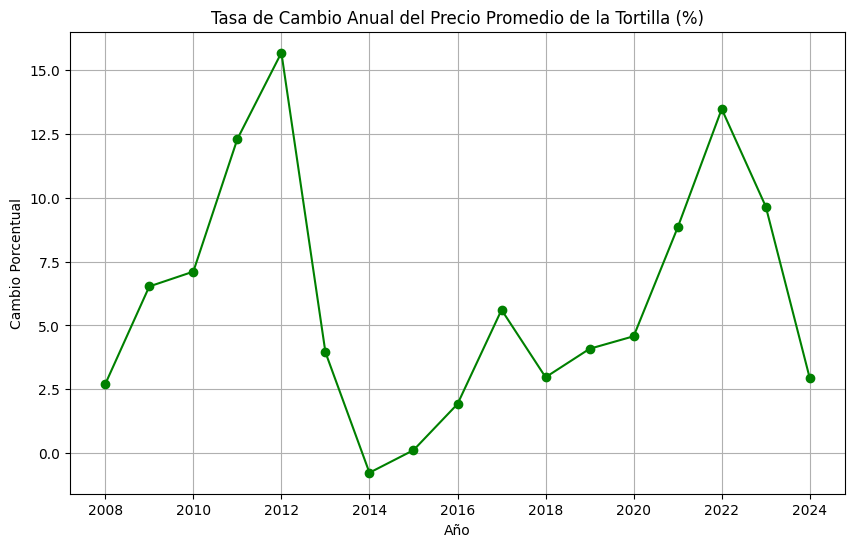

In [11]:
tasa_cambio_anual = promedio_anula.pct_change().dropna() * 100
plt.figure(figsize=(10, 6))
plt.plot(tasa_cambio_anual.index, tasa_cambio_anual.values, marker='o', linestyle='-', color='green')
plt.title('Tasa de Cambio Anual del Precio Promedio de la Tortilla (%)')
plt.xlabel('Año')
plt.ylabel('Cambio Porcentual')
plt.grid(True)
plt.show()

In [58]:
Q1 = promedio_anula.quantile(0.25)
Q3 = promedio_anula.quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
outliers_iqr = promedio_anula[(promedio_anula < limite_inferior) | (promedio_anula > limite_superior)]
print("Años con precios promedio atípicos (IQR):")
print(outliers_iqr)

media_precio = promedio_anula.mean()
desviacion_estandar = promedio_anula.std()
umbral = 2  # Puedes ajustar este valor
outliers_std = promedio_anula[abs(promedio_anula - media_precio) > umbral * desviacion_estandar]
print(f"\nAños con precios promedio que se desvían más de {umbral} desviaciones estándar:")
print(outliers_std)

Años con precios promedio atípicos (IQR):
Year
2024    19.564326
Name: Price per kilogram, dtype: float64

Años con precios promedio que se desvían más de 2 desviaciones estándar:
Series([], Name: Price per kilogram, dtype: float64)


* Cambios Abruptos (Incrementos Significativos):
    - 2012: Muestra un aumento considerable tanto en la diferencia absoluta como en la tasa de cambio.
    - 2017: Similar a 2012, con un incremento notable en ambas métricas.
    - 2021 y 2022: Claramente se destacan por los fuertes incrementos en la diferencia absoluta.
    - 2023 y 2024: Aunque los incrementos absolutos en 2023 son altos, 2024 sobresale por tener la tasa de cambio anual más alta y ser identificado como un outlier por el método IQR, lo que sugiere un comportamiento de precio significativamente diferente.

* Cambio Abrupto (Disminución Significativa):
    - 2014: Se observa una disminución tanto en la diferencia absoluta (aunque ligera) como en la tasa de cambio.

* Comportamientos Atípicos:
    - 2024: Claramente identificado como un outlier con el método IQR, lo que indica que el precio promedio de este año es significativamente más alto que el rango típico observado en el periodo.
La tendencia general de incrementos significativos en los últimos años (a partir de 2021) podría considerarse un comportamiento atípico en comparación con la mayor estabilidad de los precios en los años anteriores.

##### **5.-¿Cuál es la tendencias general del precio en el país?**

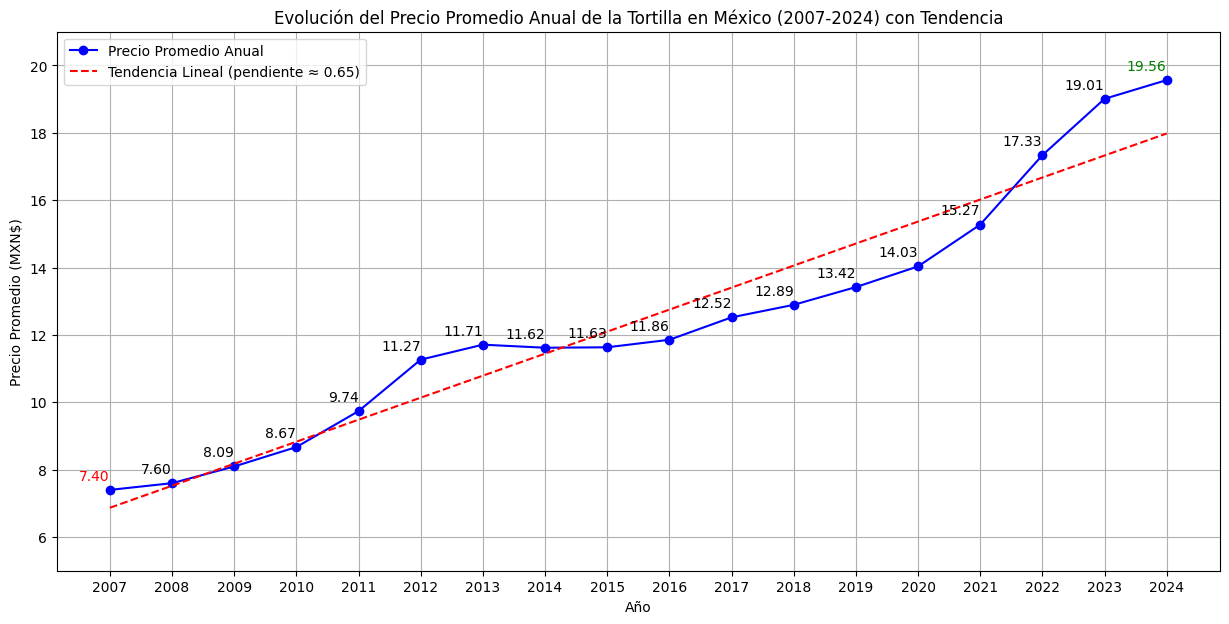

In [21]:
# Ajustar una línea de tendencia lineal (grado 1)
z = np.polyfit(promedio_anula.index, promedio_anula.values, 1)
p = np.poly1d(z)

# Graficar la serie original y la línea de tendencia
plt.figure(figsize=(15, 7))
plt.plot(promedio_anula.index, promedio_anula.values, marker='o', linestyle='-', color='blue', label='Precio Promedio Anual')
plt.plot(promedio_anula.index, p(promedio_anula.index), "r--", label=f'Tendencia Lineal (pendiente ≈ {z[0]:.2f})') # Graficar la línea de tendencia

# Agregar los valores de ventas en cada punto con colores para min y max
for x, y in zip(promedio_anula.index, promedio_anula.values):
    color = 'black'  # Color por defecto
    offeset = 0.2
    va = 'bottom'
    if y == min_precio:
        color = 'red'  # Color para el mínimo
        va = 'top'
    elif y == max_precio:
        color = 'green'  # Color para el máximo
        offeset = 0.2
        va = 'bottom'
    plt.text(x, y + offeset, f'{y:.2f}', ha='right', va='bottom', color=color)

plt.ylim(5,21)
plt.title('Evolución del Precio Promedio Anual de la Tortilla en México (2007-2024) con Tendencia')
plt.xlabel('Año')
plt.ylabel('Precio Promedio (MXN$)')
plt.grid(True)
plt.legend()

plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%d'))

plt.show()

##### **6.-¿Qué factores podrían influir en estas diferencias?**

Mi hipótesis inicial es que la inflación, los costos de la materia prima y el crimen organizado son elementos claves que impactan los precios de los bienes de consumo en México (el precio de la tortilla en este caso).
* La inflación es un factor macroeconómico fundamental. La pérdida de poder adquisitivo de la moneda inevitablemente se traslada a los precios de los productos básicos como la tortilla.
* El precio del maíz (blanco y amarillo, aunque la tortilla tradicionalmente es de maíz blanco) es el insumo principal. Las fluctuaciones en los precios internacionales y nacionales del maíz debido a factores como cosechas, clima, políticas agrícolas, subsidios y demanda global impactarán directamente el costo de producción de la tortilla. También se tendría que considerar otros insumos como el gas y la electricidad utilizados en el proceso de producción.
* Lamentablemente, en algunas regiones de México, la extorsión y el "pago de piso" exigido por grupos criminales pueden aumentar los costos operativos para los negocios, incluyendo tortillerías, lo que se traduce en precios más altos para el consumidor. La intensidad de este factor puede variar significativamente por región. La inseguridad general también llega a afectar las cadenas de suministro y los costos de transporte.

Para poder responder a esta pregunta sobre los factores, se requiere ir más allá de los datos de precios de la tortilla y explorar el contexto económico, social y político de México durante el periodo estudiado (2007-2024). Se tiene que analizar los posibles programas de subsidios, los cambios en las políticas agrícolas o comerciales, el tipo de tienda junto con sus márgenes de ganancias e inclusive los eventos económicos o crisis económicas nacionales o internacionales que llegaran a tener un impacto significativo.



##### **7.-¿Es posible encontrar patrones estacionales o cíclicos?**

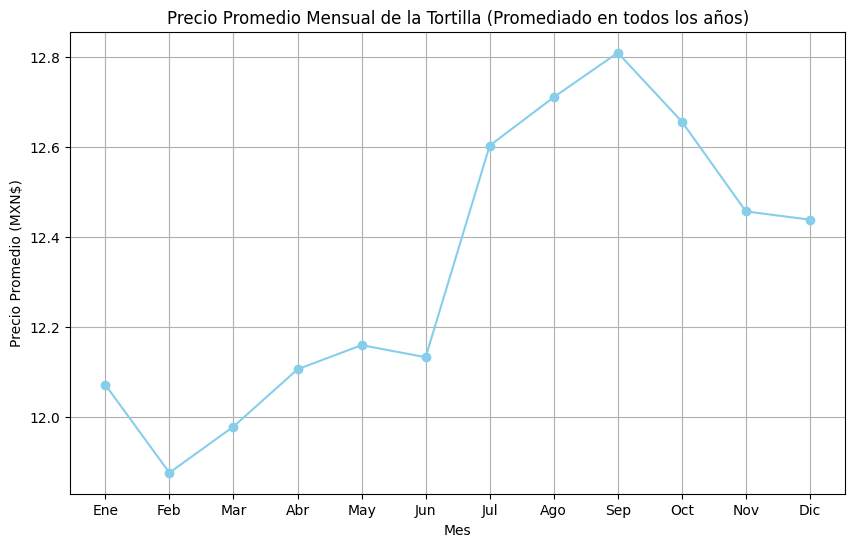

In [22]:
# Combinar Year, Month y Day en una columna de fecha
df_tortilla_prices['Date'] = pd.to_datetime(df_tortilla_prices[['Year', 'Month', 'Day']])

# Agrupar por mes y calcular el precio promedio
precio_promedio_mensual = df_tortilla_prices.groupby(df_tortilla_prices['Date'].dt.month)['Price per kilogram'].mean()

# Renombrar los índices de los meses para una mejor visualización
precio_promedio_mensual.index = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Graficar el precio promedio mensual
plt.figure(figsize=(10, 6))
plt.plot(precio_promedio_mensual.index, precio_promedio_mensual.values, marker='o', linestyle='-', color='skyblue')
plt.title('Precio Promedio Mensual de la Tortilla (Promediado en todos los años)')
plt.xlabel('Mes')
plt.ylabel('Precio Promedio (MXN$)')
plt.grid(True)
plt.show()

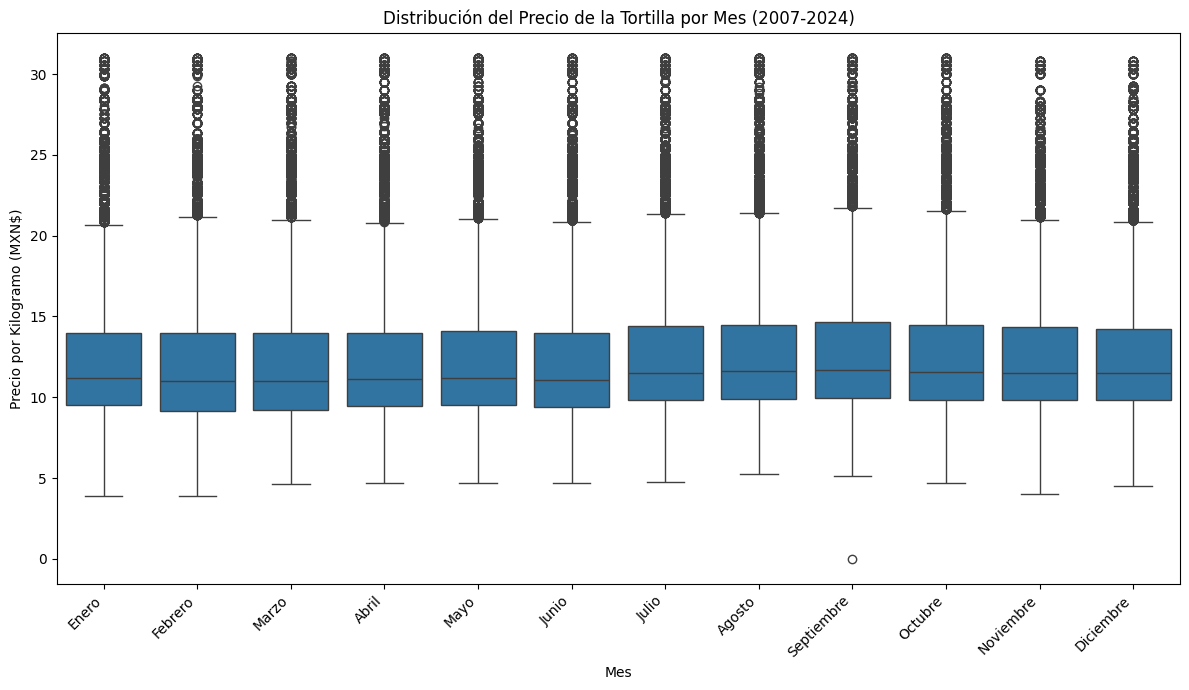

In [31]:
# Intentar establecer la configuración regional a español (México)
try:
    locale.setlocale(locale.LC_TIME, 'es_MX.UTF-8')
except locale.Error:
    try:
        locale.setlocale(locale.LC_TIME, 'es_MX')
    except locale.Error:
        try:
            locale.setlocale(locale.LC_TIME, 'es')
        except locale.Error:
            print("No se pudo establecer la configuración regional a español.")

plt.figure(figsize=(12, 7))
sns.boxplot(x=df_tortilla_prices['Date'].dt.month_name(locale='es_MX'),  # Especificar el locale en month_name()
            y='Price per kilogram',
            data=df_tortilla_prices,
            order=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']) # El 'order' ahora está en español (minúsculas)
plt.title('Distribución del Precio de la Tortilla por Mes (2007-2024)')
plt.xlabel('Mes')
plt.ylabel('Precio por Kilogramo (MXN$)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Basándonos en estas dos visualizaciones (el promedio mensual y los boxplots), no se observa un patrón estacional muy fuerte o consistente en el precio promedio de la tortilla a nivel nacional durante el periodo 2007-2024. 
Si bien la gráfica del promedio mensual sugería ligeras fluctuaciones, los boxplots muestran que la distribución de los precios dentro de cada mes es bastante similar, con medianas relativamente estables y una variabilidad comparable.